In [1]:
# import all functions
from functions import *

import matplotlib.pyplot as plt
import numpy as np

## some extra functions

In [20]:
# function for doing classifying and such
def bond_lengths_WCUCMC(dic):

    data = dic["data"]

    n_frames = len(data)

    new_array_WC = []
    new_array_UC = []
    new_array_multi = []

    for frame_data in data:
        # cutoff_distance is the Pt-C cutoff, and neighbor is the Pt-Pt cutoff, min_neighboors is the min number of neighbors for WC classification
        results = classify_and_find_distances_array(frame_data, cutoff_distance=2.1, neighbor_cutoff=3.5)
        wc_co = results[np.where(results[:, 1] == "WC")[0]]
        uc_co = results[np.where(results[:, 1] == "UC")[0]]
        multi_co = results[np.where(results[:, 1] == "MC")[0]]


        if len(wc_co)>0:
            n_WC = wc_co.shape[0]
            mean_WC = np.mean(wc_co[:,2])
            std_WC = np.std(wc_co[:,2])
            new_array_WC.append([n_WC, mean_WC, std_WC])
        else:
            new_array_WC.append([0, 0, 0])
        


        if len(uc_co)>0:
            n_UC = uc_co.shape[0]
            mean_UC = np.mean(uc_co[:,2])
            std_UC = np.std(uc_co[:,2])

            new_array_UC.append([n_UC, mean_UC, std_UC])
        else:
            new_array_UC.append([0, 0, 0])

        if len(multi_co)>0:
            n_multi = len(multi_co)
            mean_multi = np.mean(multi_co[:,2])
            std_multi = np.std(multi_co[:,2])

            new_array_multi.append([n_multi, mean_multi, std_multi])
        else:
            new_array_multi.append([0, 0, 0])

    new_array_WC = np.array(new_array_WC)
    new_array_UC = np.array(new_array_UC)
    new_array_multi = np.array(new_array_multi)

    n_WC = np.mean(new_array_WC[:,0])
    n_UC = np.mean(new_array_UC[:,0])
    n_multi = np.mean(new_array_multi[:,0])

    r_WC = np.mean(new_array_WC[:,1][new_array_WC[:,1]>1])
    r_UC = np.mean(new_array_UC[:,1][new_array_UC[:,1]>1])
    r_multi = np.mean(new_array_multi[:,1][new_array_multi[:,1]>1])

    

    return n_WC, n_UC, n_multi, r_WC, r_UC, r_multi


def read_xyz(filename):
    # Mapping from atom symbols to numbers
    symbol_to_number = {"Pt": 1, "C": 2, "O": 3}
    
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    atom_count = int(lines[0].strip())
    atoms = []
    for line in lines[2:2 + atom_count]:
        parts = line.strip().split()
        atom_type = symbol_to_number[parts[0]]  # Convert symbol to number
        atoms.append([float(parts[1]), float(parts[2]), float(parts[3]),atom_type ])
    return np.array(atoms)

## benchmark code on ideal shapes

In [55]:


benchmark147 = {}
benchmark147["data"] = [read_xyz("./test_models/modified_particle.xyz")]*10

benchmark309 = {}
benchmark309["data"] = [read_xyz("./test_models/modified_particle_309.xyz")]*10

benchmark561 = {}
benchmark561["data"] = [read_xyz("./test_models/modified_particle_561.xyz")]*10

bm_WC_147, bm_UC_147, _ , _ , _ , _ = bond_lengths_WCUCMC(benchmark147)
bm_WC_309, bm_UC_309, _ , _ , _ , _ = bond_lengths_WCUCMC(benchmark309)
bm_WC_561, bm_UC_561, _ , _ , _ , _ = bond_lengths_WCUCMC(benchmark561)

f_WC_147 = bm_WC_147 / (bm_WC_147 + bm_UC_147)
f_UC_147 = bm_UC_147 / (bm_WC_147 + bm_UC_147)

f_WC_309 = bm_WC_309 / (bm_WC_309 + bm_UC_309)
f_UC_309 = bm_UC_309 / (bm_WC_309 + bm_UC_309)

f_WC_561 = bm_WC_561 / (bm_WC_561 + bm_UC_561)
f_UC_561 = bm_UC_561 / (bm_WC_561 + bm_UC_561)

print(f"Ideal CUBO Shapes \n Fractions \n 147 | WC: {f_WC_147} | UC: {f_UC_147} \n 309 | WC: {f_WC_309} | UC: {f_UC_309} \n 561 | WC: {f_WC_561} | UC: {f_UC_561} \n")

Ideal CUBO Shapes 
 Fractions 
 147 | WC: 0.34782608695652173 | UC: 0.6521739130434783 
 309 | WC: 0.48148148148148145 | UC: 0.5185185185185185 
 561 | WC: 0.5714285714285714 | UC: 0.42857142857142855 



/home/nickj/miniconda3/envs/OVITO/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nickj/miniconda3/envs/OVITO/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## 147

In [3]:
# create the data dictionary
# edit paths

cluster_dict_147 = {}
#for i in ["148", "298", "398", "498", "623"]:
for i in ["148K_3","173K_6", "198K_6", "223K_6", "273K_6", "298K_6", "398K_6", "498K_6", "623K_6"]:

    ###########################################

    traj_dir = '/mnt/a/MD_Trajectories/PtCO/NPs/continued/cubo_147/'
    traj_name = f"Pt147_cuboct_{i}.all.bin"

    #p_name = "Pt309_cuboct_498K"
    #input_dir = "/mnt/a/MD_Trajectories/PtCO/NPs/Inputs/"
    #input_dir = "/mnt/sdcc/sdcc+u/nmarcella/MD_EXAFS_inputs/231228/"

    #pipeline.source.num_frames
    ###########################################
    
    traj_path = traj_dir + traj_name

    pipeline = import_file(traj_path)

    test_pl = MD_EXAFS_Analysis_Pipeline_PtCO(pipeline, file_params={"framerange": range(0,pipeline.source.num_frames,100),"atoms":{"Pt":1, "C":2, "O":3}, "cutoff":3}, custom_analysis_func=find_adsorbed_CO)
    #test_pl = MD_EXAFS_Binary_Pipeline_General(pipeline, file_params={"framerange": range(15999,16000),"atoms":{"Pt":1}, "cutoff":3})
    test_pl.run()

    data = test_pl.data
    n_atoms = test_pl.n_atoms_list

    n_atoms = np.array(n_atoms)
    n_co = np.mean(n_atoms[:,1])

    cluster_dict_147[i] = {"CO" :n_atoms[:,1], "data":data}

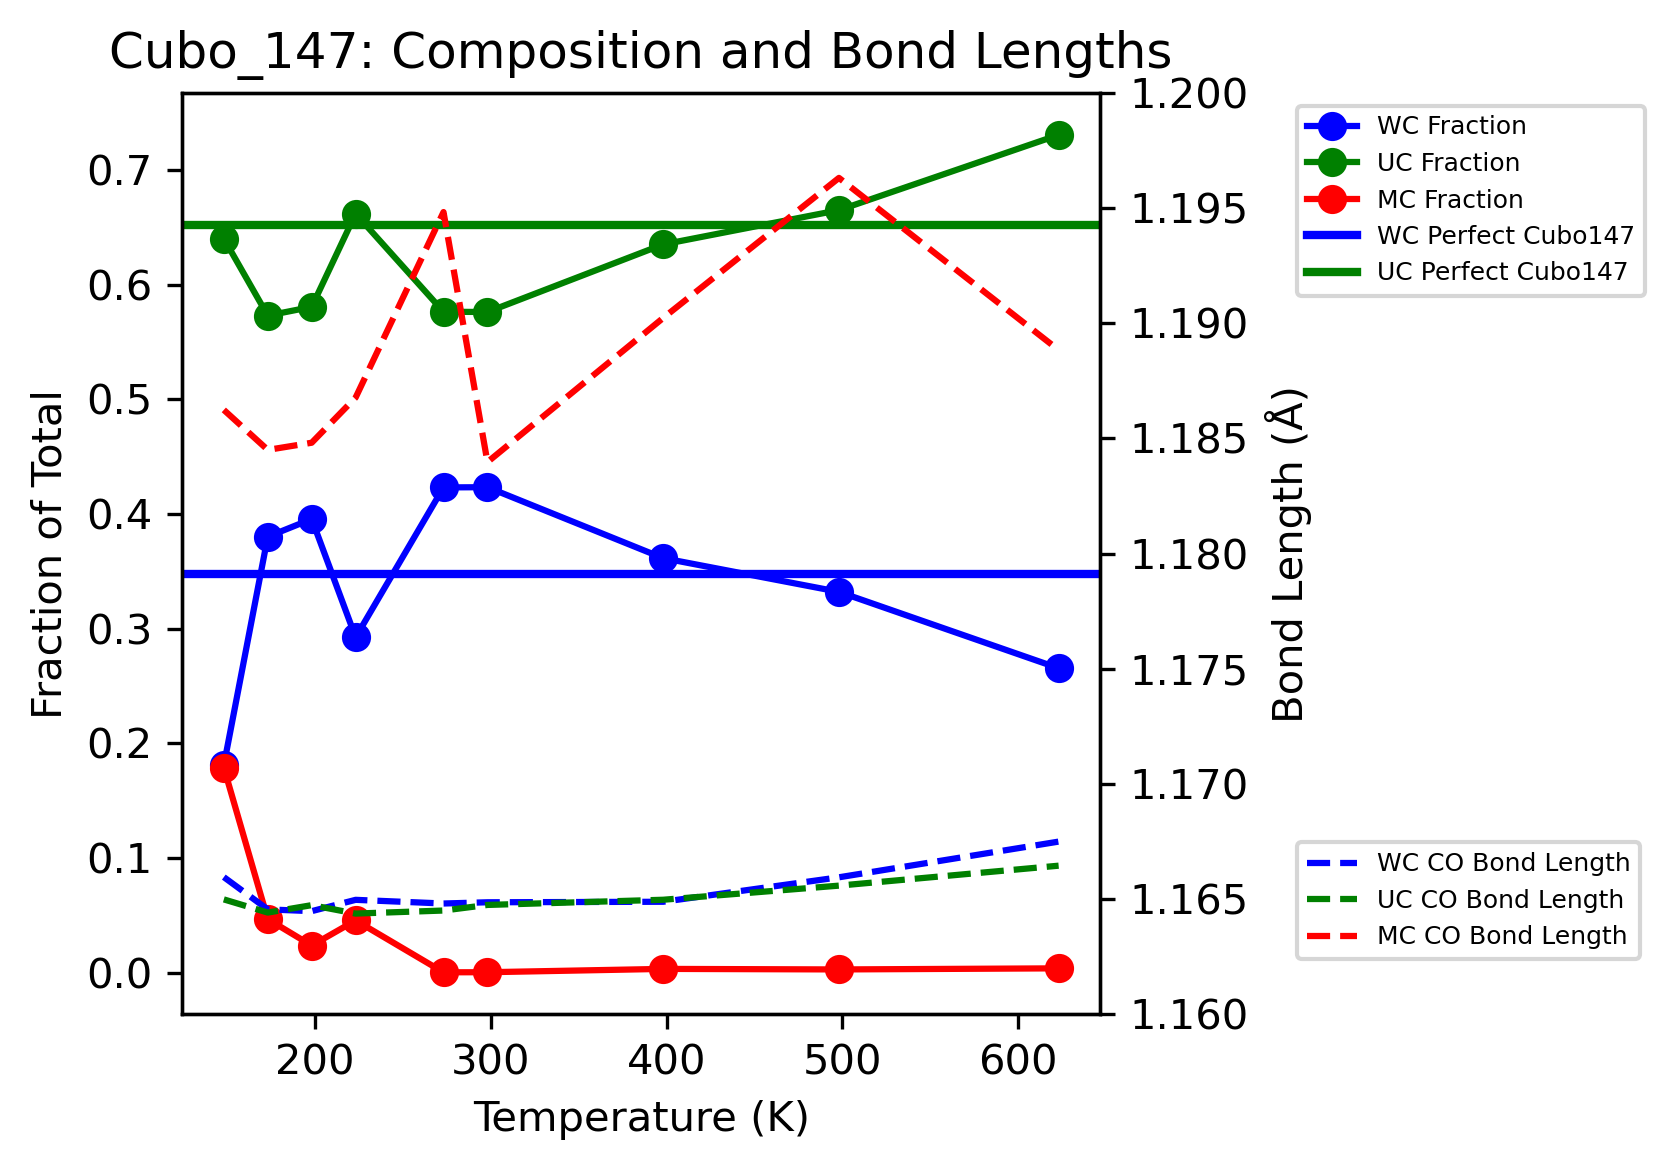

In [53]:
data_names = ["148K_3","173K_6", "198K_6", "223K_6", "273K_6", "298K_6", "398K_6", "498K_6", "623K_6"]
bond_lengths_147 = {}
for i in data_names:
    n_WC, n_UC, n_multi, r_WC, r_UC, r_multi = bond_lengths_WCUCMC(cluster_dict_147[i])
    bond_lengths_147[i] = {"n_WC": n_WC, "n_UC": n_UC, "n_multi": n_multi, "r_WC": r_WC, "r_UC": r_UC, "r_multi": r_multi}

fig, ax1 = plt.subplots(figsize=(6, 4), dpi=300)

# Aggregate data for plotting
temperatures = np.array([int(i.split("K")[0]) for i in data_names])
totals = np.array([bond_lengths_147[i]["n_WC"] + bond_lengths_147[i]["n_UC"] + bond_lengths_147[i]["n_multi"] for i in data_names])
n_WC = np.array([bond_lengths_147[i]["n_WC"] / total for i, total in zip(data_names, totals)])
n_UC = np.array([bond_lengths_147[i]["n_UC"] / total for i, total in zip(data_names, totals)])
n_multi = np.array([bond_lengths_147[i]["n_multi"] / total for i, total in zip(data_names, totals)])

# Plotting fractions on primary y-axis
ax1.plot(temperatures, n_WC, label="WC Fraction", marker='o', color='b')
ax1.plot(temperatures, n_UC, label="UC Fraction", marker='o', color='g')
ax1.plot(temperatures, n_multi, label="MC Fraction", marker='o', color='r')
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("Fraction of Total")

# Secondary axis for bond lengths
ax2 = ax1.twinx()
r_WC = np.array([bond_lengths_147[i]["r_WC"] for i in data_names])
r_UC = np.array([bond_lengths_147[i]["r_UC"] for i in data_names])
r_multi = np.array([bond_lengths_147[i]["r_multi"] for i in data_names])
ax2.plot(temperatures, r_WC, label="WC CO Bond Length", linestyle='--', color='b')
ax2.plot(temperatures, r_UC, label="UC CO Bond Length", linestyle='--', color='g')
ax2.plot(temperatures, r_multi, label="MC CO Bond Length", linestyle='--', color='r')
ax2.set_ylabel("Bond Length (Å)")
ax2.set_ylim(1.16, 1.2)

# Adding constant lines for f_WC_147 and f_UC_147
ax1.axhline(y=f_WC_147, color='blue', linestyle='-', linewidth=2, label="WC Perfect Cubo147")
ax1.axhline(y=f_UC_147, color='green', linestyle='-', linewidth=2, label="UC Perfect Cubo147")

# Adjusting legend positioning for ax1
ax1.legend(loc='upper left', bbox_to_anchor=(1.2, 1), fontsize=6)

# Adjusting legend positioning for ax2
ax2.legend(loc='upper left', bbox_to_anchor=(1.2, 0.2), fontsize=6)


plt.title("Cubo_147: Composition and Bond Lengths")
plt.tight_layout()
plt.show()

## 309

In [57]:
# create the data dictionary
# edit paths

cluster_dict_309 = {}
#for i in ["148", "323", "398", "498", "623"]:
for i in ["148K_3","173K_3", "198K_3", "223K_4", "273K_4", "323K_6", "398K_6", "498K_6", "623K_6"]:

    ###########################################

    traj_dir = '/mnt/a/MD_Trajectories/PtCO/NPs/continued/cubo_309/'
    traj_name = f"Pt309_cuboct_{i}.all.bin"

    #p_name = "Pt309_cuboct_498K"
    #input_dir = "/mnt/a/MD_Trajectories/PtCO/NPs/Inputs/"
    #input_dir = "/mnt/sdcc/sdcc+u/nmarcella/MD_EXAFS_inputs/231228/"

    #pipeline.source.num_frames
    ###########################################
    
    traj_path = traj_dir + traj_name

    pipeline = import_file(traj_path)

    test_pl = MD_EXAFS_Analysis_Pipeline_PtCO(pipeline, file_params={"framerange": range(0,pipeline.source.num_frames,100),"atoms":{"Pt":1, "C":2, "O":3}, "cutoff":3}, custom_analysis_func=find_adsorbed_CO)
    #test_pl = MD_EXAFS_Binary_Pipeline_General(pipeline, file_params={"framerange": range(15999,16000),"atoms":{"Pt":1}, "cutoff":3})
    test_pl.run()

    data = test_pl.data
    n_atoms = test_pl.n_atoms_list

    n_atoms = np.array(n_atoms)
    n_co = np.mean(n_atoms[:,1])

    cluster_dict_309[i] = {"CO" :n_atoms[:,1], "data":data}

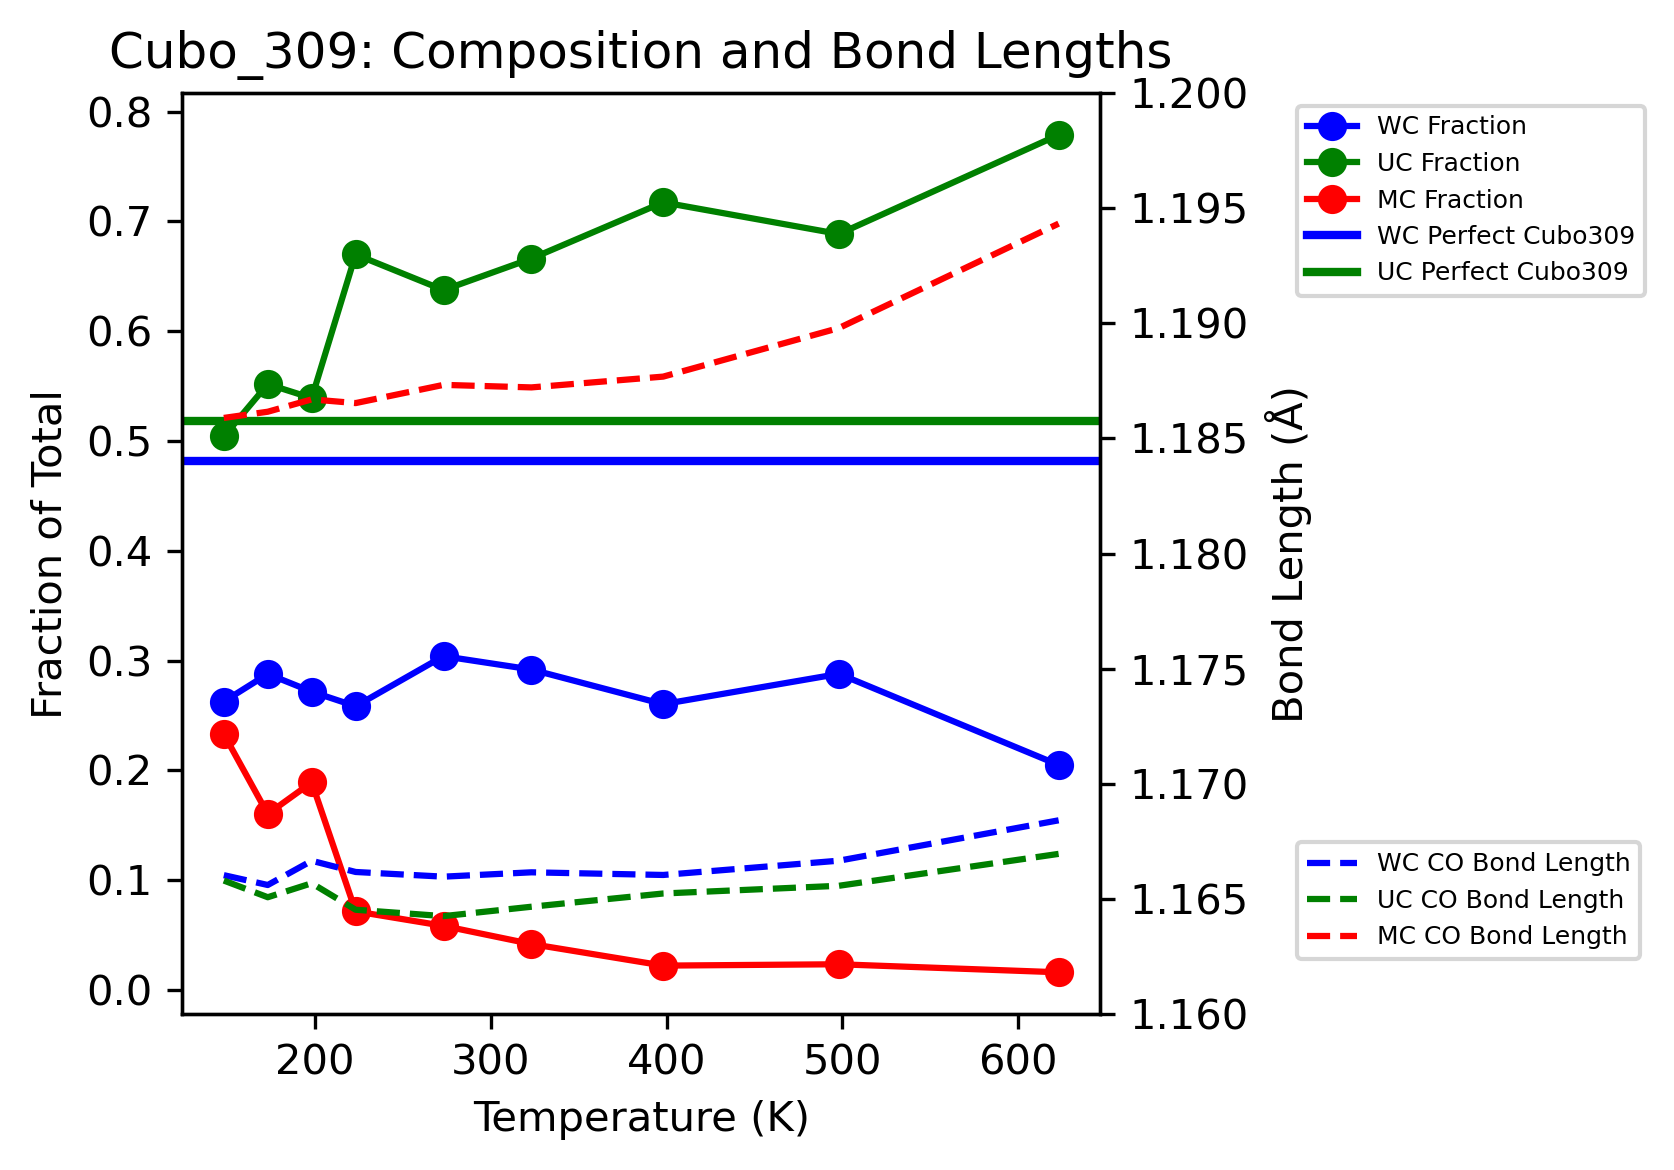

In [58]:
data_names = ["148K_3","173K_3", "198K_3", "223K_4", "273K_4", "323K_6", "398K_6", "498K_6", "623K_6"]
bond_lengths_309 = {}
for i in data_names:
    n_WC, n_UC, n_multi, r_WC, r_UC, r_multi = bond_lengths_WCUCMC(cluster_dict_309[i])
    bond_lengths_309[i] = {"n_WC": n_WC, "n_UC": n_UC, "n_multi": n_multi, "r_WC": r_WC, "r_UC": r_UC, "r_multi": r_multi}

fig, ax1 = plt.subplots(figsize=(6, 4), dpi=300)

# Aggregate data for plotting
temperatures = np.array([int(i.split("K")[0]) for i in data_names])
totals = np.array([bond_lengths_309[i]["n_WC"] + bond_lengths_309[i]["n_UC"] + bond_lengths_309[i]["n_multi"] for i in data_names])
n_WC = np.array([bond_lengths_309[i]["n_WC"] / total for i, total in zip(data_names, totals)])
n_UC = np.array([bond_lengths_309[i]["n_UC"] / total for i, total in zip(data_names, totals)])
n_multi = np.array([bond_lengths_309[i]["n_multi"] / total for i, total in zip(data_names, totals)])

# Plotting fractions on primary y-axis
ax1.plot(temperatures, n_WC, label="WC Fraction", marker='o', color='b')
ax1.plot(temperatures, n_UC, label="UC Fraction", marker='o', color='g')
ax1.plot(temperatures, n_multi, label="MC Fraction", marker='o', color='r')
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("Fraction of Total")

# Secondary axis for bond lengths
ax2 = ax1.twinx()
r_WC = np.array([bond_lengths_309[i]["r_WC"] for i in data_names])
r_UC = np.array([bond_lengths_309[i]["r_UC"] for i in data_names])
r_multi = np.array([bond_lengths_309[i]["r_multi"] for i in data_names])
ax2.plot(temperatures, r_WC, label="WC CO Bond Length", linestyle='--', color='b')
ax2.plot(temperatures, r_UC, label="UC CO Bond Length", linestyle='--', color='g')
ax2.plot(temperatures, r_multi, label="MC CO Bond Length", linestyle='--', color='r')
ax2.set_ylabel("Bond Length (Å)")
ax2.set_ylim(1.16, 1.2)

# Adding constant lines for f_WC_309 and f_UC_309
ax1.axhline(y=f_WC_309, color='blue', linestyle='-', linewidth=2, label="WC Perfect Cubo309")
ax1.axhline(y=f_UC_309, color='green', linestyle='-', linewidth=2, label="UC Perfect Cubo309")

# Adjusting legend positioning for ax1
ax1.legend(loc='upper left', bbox_to_anchor=(1.2, 1), fontsize=6)

# Adjusting legend positioning for ax2
ax2.legend(loc='upper left', bbox_to_anchor=(1.2, 0.2), fontsize=6)


plt.title("Cubo_309: Composition and Bond Lengths")
plt.tight_layout()
plt.show()

## 561

In [59]:
# create the data dictionary
# edit paths

cluster_dict_561 = {}
#for i in ["148", "323", "398", "498", "623"]:
for i in ["148K_5","173K_7", "198K_7", "223K_7", "273K_7", "298K_6", "398K_6", "498K_6", "623K_6"]:

    ###########################################

    traj_dir = '/mnt/a/MD_Trajectories/PtCO/NPs/continued/cubo_561/'
    traj_name = f"Pt561_cuboct_{i}.all.bin"

    #p_name = "Pt561_cuboct_498K"
    #input_dir = "/mnt/a/MD_Trajectories/PtCO/NPs/Inputs/"
    #input_dir = "/mnt/sdcc/sdcc+u/nmarcella/MD_EXAFS_inputs/231228/"

    #pipeline.source.num_frames
    ###########################################
    
    traj_path = traj_dir + traj_name

    pipeline = import_file(traj_path)

    test_pl = MD_EXAFS_Analysis_Pipeline_PtCO(pipeline, file_params={"framerange": range(0,pipeline.source.num_frames,100),"atoms":{"Pt":1, "C":2, "O":3}, "cutoff":3}, custom_analysis_func=find_adsorbed_CO)
    #test_pl = MD_EXAFS_Binary_Pipeline_General(pipeline, file_params={"framerange": range(15999,16000),"atoms":{"Pt":1}, "cutoff":3})
    test_pl.run()

    data = test_pl.data
    n_atoms = test_pl.n_atoms_list

    n_atoms = np.array(n_atoms)
    n_co = np.mean(n_atoms[:,1])

    cluster_dict_561[i] = {"CO" :n_atoms[:,1], "data":data}

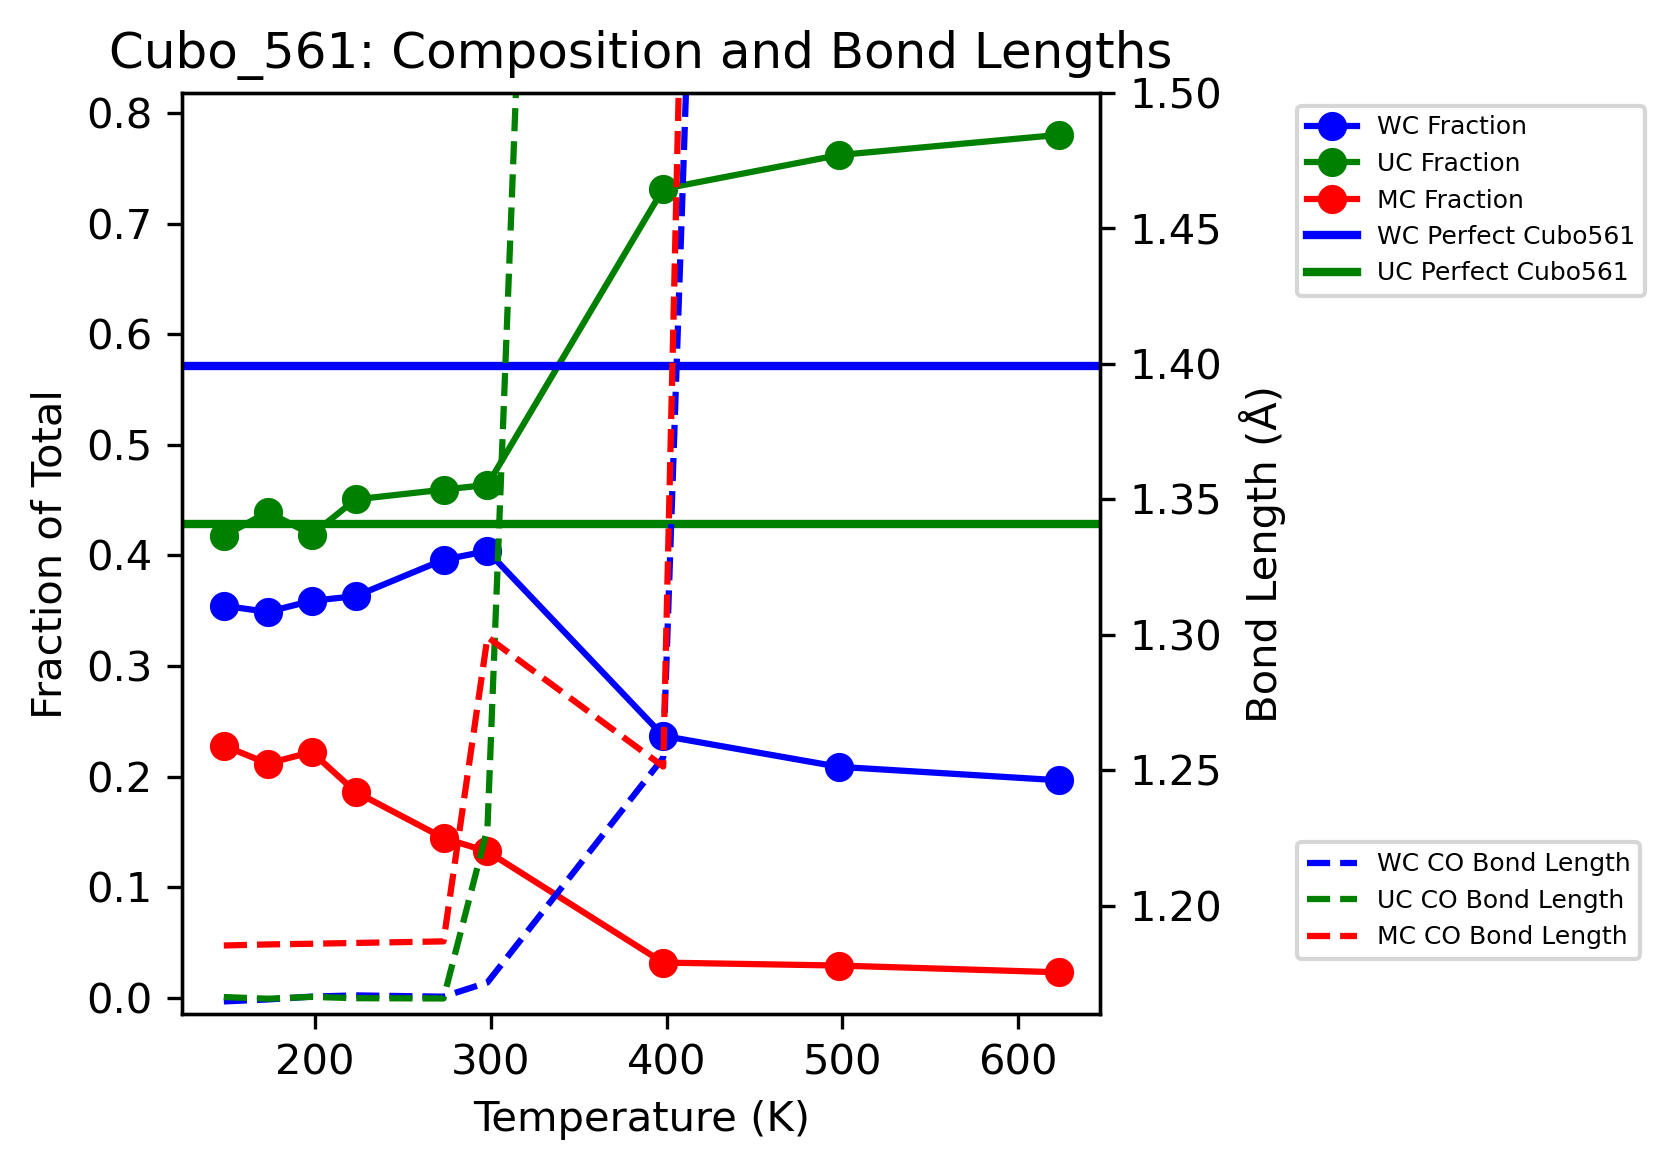

In [62]:
data_names = ["148K_5","173K_7", "198K_7", "223K_7", "273K_7", "298K_6", "398K_6", "498K_6", "623K_6"]
bond_lengths_561 = {}
for i in data_names:
    n_WC, n_UC, n_multi, r_WC, r_UC, r_multi = bond_lengths_WCUCMC(cluster_dict_561[i])
    bond_lengths_561[i] = {"n_WC": n_WC, "n_UC": n_UC, "n_multi": n_multi, "r_WC": r_WC, "r_UC": r_UC, "r_multi": r_multi}

fig, ax1 = plt.subplots(figsize=(6, 4), dpi=300)

# Aggregate data for plotting
temperatures = np.array([int(i.split("K")[0]) for i in data_names])
totals = np.array([bond_lengths_561[i]["n_WC"] + bond_lengths_561[i]["n_UC"] + bond_lengths_561[i]["n_multi"] for i in data_names])
n_WC = np.array([bond_lengths_561[i]["n_WC"] / total for i, total in zip(data_names, totals)])
n_UC = np.array([bond_lengths_561[i]["n_UC"] / total for i, total in zip(data_names, totals)])
n_multi = np.array([bond_lengths_561[i]["n_multi"] / total for i, total in zip(data_names, totals)])

# Plotting fractions on primary y-axis
ax1.plot(temperatures, n_WC, label="WC Fraction", marker='o', color='b')
ax1.plot(temperatures, n_UC, label="UC Fraction", marker='o', color='g')
ax1.plot(temperatures, n_multi, label="MC Fraction", marker='o', color='r')
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("Fraction of Total")

# Secondary axis for bond lengths
ax2 = ax1.twinx()
r_WC = np.array([bond_lengths_561[i]["r_WC"] for i in data_names])
r_UC = np.array([bond_lengths_561[i]["r_UC"] for i in data_names])
r_multi = np.array([bond_lengths_561[i]["r_multi"] for i in data_names])
ax2.plot(temperatures, r_WC, label="WC CO Bond Length", linestyle='--', color='b')
ax2.plot(temperatures, r_UC, label="UC CO Bond Length", linestyle='--', color='g')
ax2.plot(temperatures, r_multi, label="MC CO Bond Length", linestyle='--', color='r')
ax2.set_ylabel("Bond Length (Å)")
ax2.set_ylim(1.16, 1.5)

# Adding constant lines for f_WC_561 and f_UC_561
ax1.axhline(y=f_WC_561, color='blue', linestyle='-', linewidth=2, label="WC Perfect Cubo561")
ax1.axhline(y=f_UC_561, color='green', linestyle='-', linewidth=2, label="UC Perfect Cubo561")

# Adjusting legend positioning for ax1
ax1.legend(loc='upper left', bbox_to_anchor=(1.2, 1), fontsize=6)

# Adjusting legend positioning for ax2
ax2.legend(loc='upper left', bbox_to_anchor=(1.2, 0.2), fontsize=6)


plt.title("Cubo_561: Composition and Bond Lengths")
plt.tight_layout()
plt.show()